In [1]:
import itertools
from random import randint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  train_test_split

Using TensorFlow backend.


In [2]:
# hyperparameters
epochs = 5
batch_size = 120
num_classes = 10

# Dataset

## 1. Load dataset from CSV

In [3]:
data = pd.read_csv("train.csv");

In [4]:
data.tail()

,label,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p2490,p2491,p2492,p2493,p2494,p2495,p2496,p2497,p2498,p2499
2295,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2296,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2298,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2299,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Convert to Numpy array as `float32`

In [5]:
train = data[:1840]
test = data[1840:2300]

# labels
y_train = train['label'].values
y_test = test['label'].values

# images 
X_train = train.drop(labels=['label'], axis = 1).to_numpy()
X_train = X_train.reshape(-1, 50, 50, 1).astype('float32')
X_test = test.drop(labels=['label'], axis=1).to_numpy()
X_test = X_test.reshape(-1, 50, 50, 1).astype('float32')

del train
del test

In [6]:
print('Train data:')
print('\tX_train shape:', X_train.shape)
print('\tX_train dtype:', X_train.dtype)
print('\tNo. of train data:', X_train.shape[0])
print()
print('Test data:')
print('\tX_test shape:', X_test.shape)
print('\tX_test dtype:', X_test.dtype)
print('\tNo. of test data:', X_test.shape[0])

Train data:
	X_train shape: (1840, 50, 50, 1)
	X_train dtype: float32
	No. of train data: 1840

Test data:
	X_test shape: (460, 50, 50, 1)
	X_test dtype: float32
	No. of test data: 460


## 3. Visualize the dataset

In [7]:
def show_batch(xs, ys):
    start = randint(0, len(xs)-9)
    for i in range(9):
      idx = start + i
      plt.subplot(330 + 1 + i)
      plt.title(str(ys[idx]))
      plt.imshow(xs[idx].reshape(50, 50), cmap='gray')
      plt.axis('off')
    plt.show()

### Training data

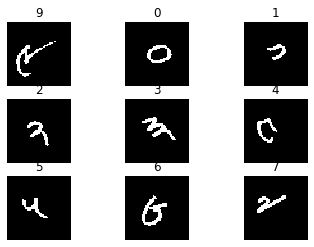

In [8]:
show_batch(X_train, y_train)

### Testing data

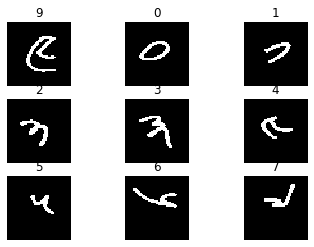

In [9]:
show_batch(X_test, y_test)

## 4. Check for class distribution / class imbalance

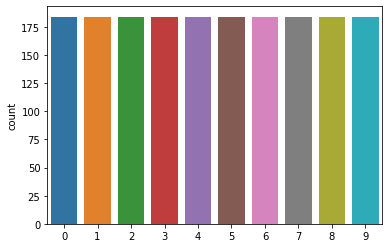

In [10]:
g = sns.countplot(y_train)

In [11]:
len(y_test)

460

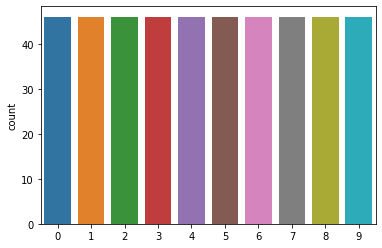

In [12]:
g = sns.countplot(y_test)

## 5. Preprocessing

**Note**: Images are already normalized, i.e `[0.0 - 1.0]`

In [13]:
np.max(X_train), np.min(X_train), np.max(X_test), np.min(X_test)

(1.0, 0.0, 1.0, 0.0)

### convert labels to `one-hot` vectors

In [14]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (1840, 10)
y_test shape: (460, 10)


## 6. Split into Train and Validation dataset

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [16]:
print('Train data:')
print('\tX_train shape:', X_train.shape)
print('\tX_train dtype:', X_train.dtype)
print('\tNo. of train data:', X_train.shape[0])
print()
print('Validation data:')
print('\tX_val shape:', X_val.shape)
print('\tX_val dtype:', X_val.dtype)
print('\tNo. of val data:', X_val.shape[0])

Train data:
	X_train shape: (1472, 50, 50, 1)
	X_train dtype: float32
	No. of train data: 1472

Validation data:
	X_val shape: (368, 50, 50, 1)
	X_val dtype: float32
	No. of val data: 368


# Model: CNN

In [17]:
def model():
    model=models.Sequential()
    model.add(layers.Conv2D(64,(3,3), activation="relu", input_shape=X_train.shape[1:]))
    model.add(layers.Conv2D(64,(3,3), activation="relu"))
    
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128,(3,3), activation="relu"))
    model.add(layers.Conv2D(128,(3,3), activation="relu"))
    
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256,(3,3), activation="relu"))
    
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    return model

In [18]:
model = model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)       147584    
_________________________________________________________________
max_

In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

# Training

In [20]:
history = model.fit(X_train, y_train, 
                    epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1472 samples, validate on 368 samples
Epoch 1/5
1472/1472 [==============================] - 41s 28ms/step - loss: 1.8053 - acc: 0.4545 - val_loss: 4.1088 - val_acc: 0.3397
Epoch 2/5
1472/1472 [==============================] - 41s 28ms/step - loss: 0.7232 - acc: 0.7826 - val_loss: 1.3930 - val_acc: 0.6658
Epoch 3/5
1472/1472 [==============================] - 40s 27ms/step - loss: 0.3158 - acc: 0.8995 - val_loss: 1.3168 - val_acc: 0.7147
Epoch 4/5
1472/1472 [==============================] - 36s 25ms/step - loss: 0.1502 - acc: 0.9490 - val_loss: 0.9648 - val_acc: 0.7582
Epoch 5/5
1472/1472 [==============================] - 36s 25ms/step - loss: 0.0762 - acc: 0.9749 - val_loss: 0.7772 - val_acc: 0.7989


### Visualize the training step

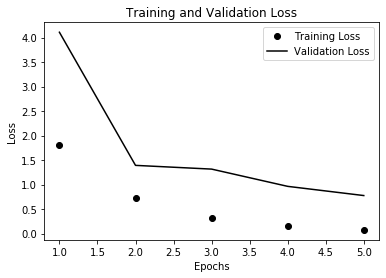

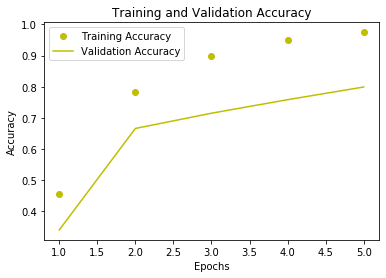

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

eps = range(1, epochs+1)
plt.plot(eps, loss, 'ko', label = 'Training Loss')
plt.plot(eps, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(eps, acc, 'yo', label = 'Training Accuracy')
plt.plot(eps, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluation

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]:0.04}')
print(f'Test accuracy:{score[1]:0.4}')

Test loss: 0.8659
Test accuracy:0.7696


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

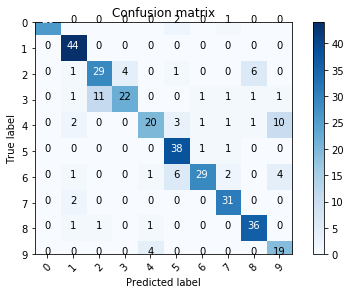

In [25]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
confusion_mtx.shape
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [26]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

In [27]:
def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(20, 10))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((50,50)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

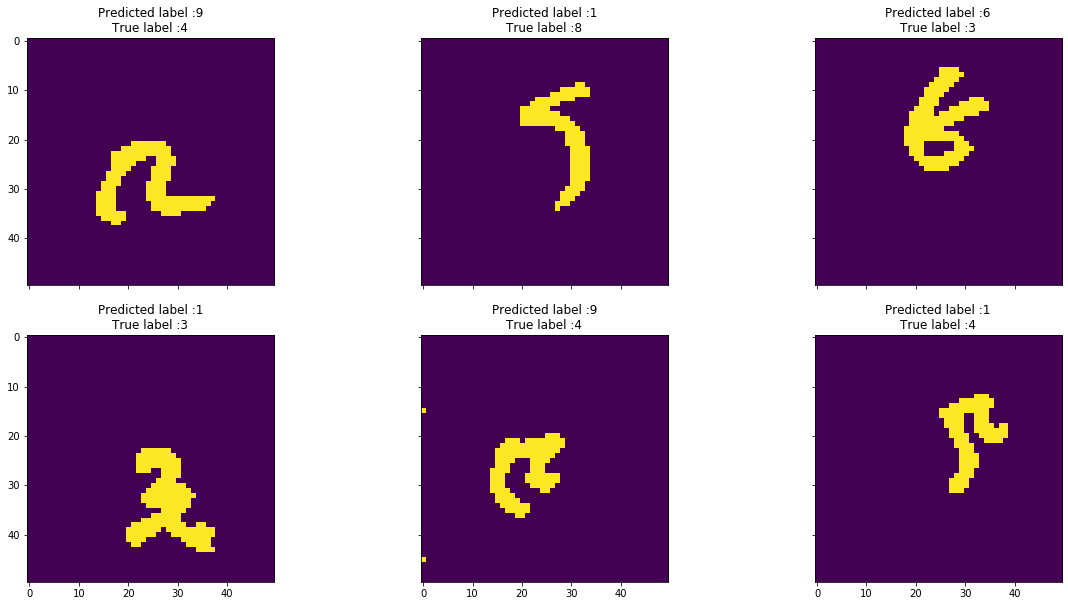

In [28]:
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

# Save the Model

In [124]:
model.save('model2shuffle.h5');